<h1>Spindle Detection Algorithm</h1>

In [2]:
# Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Package for processing EDF++ files
import mne

In [3]:
# Necessary file names ready to go:
path = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\mass_data\01-02-0001_PSG"
file = r"01-02-0001_PSG.edf"
scorer_annot_1 = r"01-02-0001_Annotations.csv"
scorer_annot_2 = r"01-02-0001_Annotations2.csv"
sleep_stages_filename = r"01-02-0001_Stages.edf"

# Load raw MNE file. Preload = False (Save hard drive memory):
raw_file = path + "\\" + file
raw = mne.io.read_raw_edf(raw_file, preload=False, verbose=False)

# Load annotations per the sleep stage EDF file into workspace
sleep_stages_file = path + "\\" + sleep_stages_filename
stages = mne.read_annotations(sleep_stages_file)

# Set the annotations onto the raw file:
raw.set_annotations(stages)

# Get the event and event_id from the annotations:
event, event_id = mne.events_from_annotations(raw)

# Create epochs from the event and event_id
epochs = mne.Epochs(raw, event, event_id, tmin=0.0, tmax=20, baseline=None) # 20 second epochs (based off stage annotations)

# Create dataframe from epochs
epochs_df = epochs.to_data_frame()

<ipython-input-3-9c3d9df424b6>:10: RuntimeWarning: 2 channel names are too long, have been truncated to 15 characters:
['EOG Lower Vertic', 'EOG Upper Vertic']
  raw = mne.io.read_raw_edf(raw_file, preload=False, verbose=False)


Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage ?', 'Sleep stage R', 'Sleep stage W']
1419 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 1419 events and 5121 original time points ...
0 bad epochs dropped
Converting "time" to "<class 'numpy.int64'>"...


In [4]:
epochs_df.head()

channel                   EOG Right Horiz  Resp nasal  EEG Pz-LER  \
condition     epoch time                                            
Sleep stage ? 0     0          -32.573788   20.132534 -257.963051   
                    4          -31.816386   19.894342 -257.963051   
                    8          -30.806517   19.822884 -257.963051   
                    12         -28.534311   19.965799 -257.963051   
                    16         -32.321321   20.251629 -257.963051   

channel                   EEG Fp1-LER  EMG Chin  EEG Fpz-LER  EEG Cz-LER  \
condition     epoch time                                                   
Sleep stage ? 0     0       -4.917746 -1.832980    -8.070029    1.344633   
                    4       -3.529177  2.874355    -5.121987    5.323181   
                    8       -5.170213  2.824788    -8.198205    1.087952   
                    12      -6.306314 -6.617764    -9.608139   -1.727513   
                    16      -6.053847 -7.633892   -11.915302   -6.347763   

channel                   EEG O1-LER  EEG C4-LER  EEG F3-LER  ...  EEG F8-LER  \
condition     epoch time                                      ...               
Sleep stage ? 0     0     -12.849489   -3.166658   -4.515893  ...  -21.353666   
                    4      -9.025625    0.124147   -2.478145  ...  -18.565971   
                    8     -13.612672   -3.801030   -4.897970  ...  -22.874228   
                    12    -13.485475   -4.435402   -4.897970  ...  -21.860520   
                    16    -12.849489   -6.084769   -6.298922  ...  -22.240660   

channel                   EOG Upper Verti  EEG T6-LER  EEG T4-LER  EEG F7-LER  \
condition     epoch time                                                        
Sleep stage ? 0     0          -71.761064  -11.318982  -14.040031    0.954687   
                    4          -67.964469   -6.939513   -9.458811    1.593110   
                    8          -67.205149   -8.065662  -10.983238    0.954687   
                    12         -64.420979   -5.312853   -8.696598    2.231534   
                    16         -63.408554   -3.561065   -8.061420    0.954687   

channel                   EEG P3-LER       ECG I  EEG A2-LER  EEG F4-LER  \
condition     epoch time                                                   
Sleep stage ? 0     0      -5.192701 -242.737900  -46.938327   -8.973465   
                    4       0.959612 -257.192393  -40.960060   -7.190436   
                    8      -3.780958 -255.987852  -40.069680  -11.265931   
                    12     -3.909298 -246.351523  -44.521581  -12.539523   
                    16     -5.449381 -253.578770  -48.854234  -14.457872   

channel                   EEG T3-LER  
condition     epoch time              
Sleep stage ? 0     0     -12.428005  
                    4     -10.120842  
                    8     -10.505369  
                    12     -8.710908  
                    16     -8.454557  

[5 rows x 27 columns]

In [5]:
eeg_epochs_df = epochs_df[['EEG C3-LER']]
eeg_epochs = eeg_epochs_df.loc["Sleep stage 2", :]
eeg_epochs

channel      EEG C3-LER
epoch time             
13    0       -4.456643
      4       -6.138015
      8       -6.138015
      12      -4.973989
      16      -1.740580
...                 ...
1409  19983    4.976825
      19987    4.718152
      19991    6.658197
      19995    6.270188
      19999    7.692888

[3815145 rows x 1 columns]

In [6]:
scorer_1 = path + "\\" + scorer_annot_1
s1_df = pd.read_csv(scorer_1)
s1_df.columns = ['start', 'duration']
s1_df['end'] = s1_df['start'] + s1_df['duration']

scorer_intersection = s1_df

In [7]:
# Get all the unique epochs from the dataframe:
temp = epochs_df.reset_index(drop=False)
tmp = temp[temp['condition'] == 'Sleep stage 2']
epoch_list = tmp['epoch'].unique()

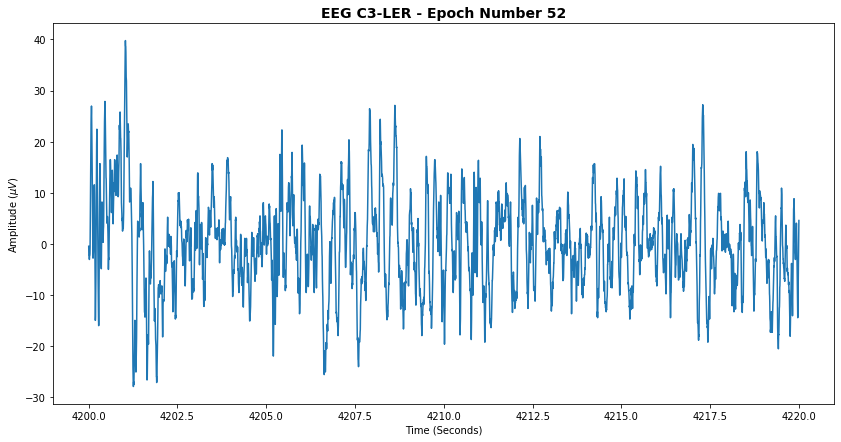

<Figure size 432x288 with 0 Axes>

In [67]:
epoch = epoch_list[51]
example = eeg_epochs.loc[epoch]
signal = example['EEG C3-LER']

# Make time axis reflect the true time-value it was extracted from (from full EEG recording)
time = example.index.values / 1000
time = time + (epoch * 20)

fig = plt.figure(figsize=(14,7))
plt.plot(time, signal)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude ($\mu V$)')
plt.title("EEG C3-LER - Epoch Number {}".format(52), fontsize=14, fontweight='bold')
plt.show()
plt.savefig("epoch_example.png", dpi=300)

In [68]:
# Import signal processing functions from Scipy
from scipy.signal import butter, lfilter, sosfilt, filtfilt
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import hilbert
from scipy.signal.windows import hann

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [69]:
sampling_rate = raw.info['sfreq']
signal_filtered = butter_bandpass_filter(signal, 10, 16, sampling_rate, order=5)

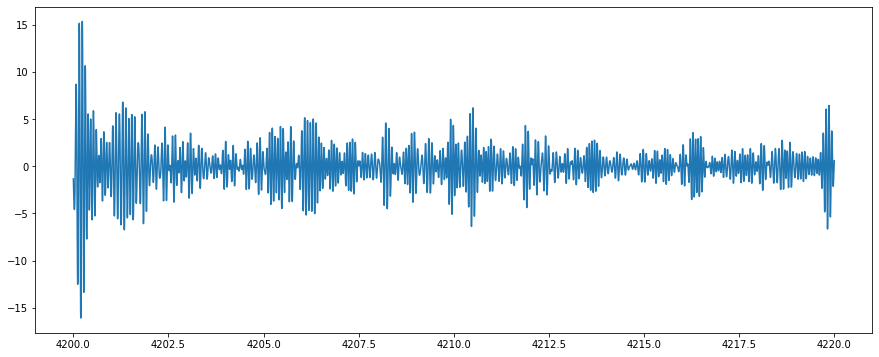

In [70]:
fig = plt.figure(figsize=(15,6))
plt.plot(time, signal_filtered)
plt.show()

In [71]:
# Generate a smoothing filter with a 200 ms window size:
smoothing_size = 0.2
smoothing = np.ones(1, np.floor(smoothing_size * raw.info['sfreq']))

# Compute the Hilbert transform of the signal:
sig_filt_env = abs(hilbert(signal_filtered))

# Smooth the Sigma envelope via convolution between the moving average window and the envelope itself:
sig_filt_env_smooth = np.convolve(sig_filt_env, smoothing)

# Compute the upper and lower threshold for spindle detection:
upper_thresh = 5 * np.median(sig_filt_env_smooth)
lower_thresh = 2 * np.median(sig_filt_env_smooth)

# Decision algorithm based on signal meeting BOTH lower and upper thresholds:
lower_cond = (sig_filt_env_smooth == lower_thresh)
upper_cond = (sig_filt_env_smooth == upper_thresh)

In [72]:
# Determine the indices where the threshold has been met by the sigma envelope.
# Tolerance = 0.05 seconds = 50 ms. Plug the indices into the time-array to determine
# the times corresponding to the detected arrays:
lower_cond_met = np.where(np.isclose(sig_filt_env_smooth, lower_thresh, atol = 5e-01))
time_lower = time[lower_cond_met]
upper_cond_met = np.where(np.isclose(sig_filt_env_smooth, upper_thresh, atol = 5e-01))
time_upper = time[upper_cond_met]

# A potential spindle is met when the time-interval detected by the UPPER threshold
# is bound between a time-interval detected by the LOWER threshold.
# Potential Spindle Times:
potential_spindles = [];
for i in range(len(time_lower) - 1):
    delta_min = time_lower[i];
    delta_max = time_lower[i+1];
    for instance in time_upper:
        if ((instance > delta_min) & (instance < delta_max)):
            potential_spindles.append(delta_min)
            potential_spindles.append(delta_max)
            
# However, if the time-span is too short or too long, then we shouldn't count these as spindles. Perhaps we can say
# that is the time-span of the potential spindles MUST be >= 500 ms (0.5s) and <= to 2000 ms (2s). This is consistent
# with the AASM definition.
final_spindles = [];
for i in range(len(potential_spindles) - 1):
    # Compute the time-differential:
    time_diff = potential_spindles[i+1] - potential_spindles[i]
    # Check if time-diff fits the AASM spindle length criterion:
    if ((time_diff >= 0.5) & (time_diff <= 2.0)):
        final_spindles.append(potential_spindles[i])
        final_spindles.append(potential_spindles[i+1])

# Convert the final_spindles array into a NumPy array if in need of any processing. We also want the unique instances.
# That is, no duplicate time samples in the array:
final_spindles = np.unique(np.array(final_spindles))

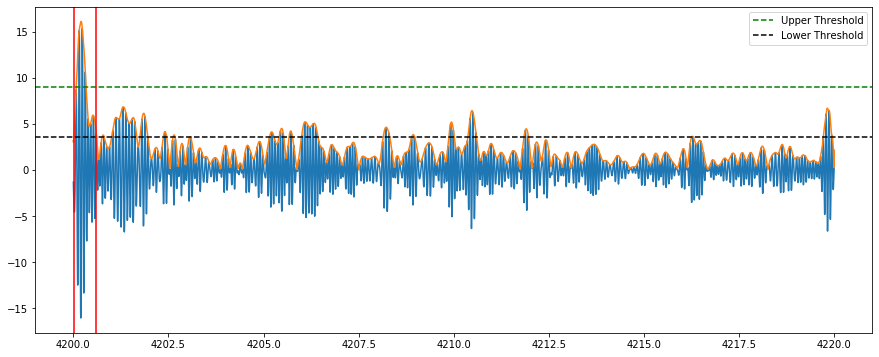

In [73]:
# Plot BOTH the original bandpassed signal as well as the envelope:
fig = plt.figure(figsize=(15,6))
plt.plot(time, signal_filtered)
plt.plot(time, sig_filt_env)
plt.axhline(upper_thresh, linestyle='--', color='green', label='Upper Threshold')
plt.axhline(lower_thresh, linestyle='--', color='black', label='Lower Threshold')

# Plot the annotations generated from the automatic detection scheme:
for instances in final_spindles:
    plt.axvline(instances, linestyle='-', color='red')

# Plot the legend on the graph as well:
plt.legend()
    
# Plot the graph:    
plt.show()

In [74]:
4 * np.std(sig_filt_env_smooth)

7.81484284815862

In [75]:
# Separate the instances in the 'final_spindles' array into an array for onset and offset markers
# Every 'off' array element MUST be an onset while every even array element MUST be an offset.
onsets = [];
offsets = [];

for i in range(len(final_spindles)):
    if (i % 2 == 0):
        onsets.append(final_spindles[i])
    else:
        offsets.append(final_spindles[i])

# Compute the duration between the onset markers and their corresponding offsets:
durations = [];
for on, off in zip(onsets, offsets):
    dur = off - on
    durations.append(dur)

# Generate a dataframe with Column1 = onsets, Column2 = durations and Column3 = offsets.
start = pd.Series(onsets)
duration = pd.Series(durations)
end = pd.Series(offsets)
frame = {'start':start, 'duration':duration, 'end':end}
auto_annotations = pd.DataFrame(frame)

In [76]:
auto_annotations

,start,duration,end
0,4200.016,0.586,4200.602


In [77]:
# Begin with scorer 1:
scorer_1 = path + "\\" + scorer_annot_1
s1_df = pd.read_csv(scorer_1)
s1_df.columns = ['start', 'duration']
s1_df['end'] = s1_df['start'] + s1_df['duration']

# Make a temporary column for the start times rounded to the nearest integer:
s1_df['start_floor'] = s1_df['start'].astype('int32')

# Then load scorer 2:
scorer_2 = path + "\\" + scorer_annot_2
s2_df = pd.read_csv(scorer_2)
s2_df.columns = ['start', 'duration']
s2_df['end'] = s2_df['start'] + s2_df['duration']

# Make a temporary column for the start times rounded to the nearest integer:
s2_df['start_floor'] = s2_df['start'].astype('int32')

# Get the 'inner join' of the two scorers' dataframes in order to get the ground truth.
scorer_inner = pd.merge(s1_df, s2_df, how='inner', on=['start_floor'])
scorer_inner.head()

# Take the mean of the start (onset) tie, duration of the spindle and the end time for each scorer:
scorer_final = pd.DataFrame()
scorer_final['start'] = (scorer_inner['start_x'] + scorer_inner['start_y']) / 2
scorer_final['duration'] = (scorer_inner['duration_x'] + scorer_inner['duration_y']) / 2
scorer_final['end'] = (scorer_inner['end_x'] + scorer_inner['end_y']) / 2

scorer_intersection = scorer_final

# Need to determine if there are any expert annotations that occur in the epoch itself.
condition = (scorer_final['start'] >= min(time)) & (scorer_final['end'] <= max(time))
scorer_annotations = scorer_final[condition].reset_index(drop=True)
scorer_annotations

,start,duration,end
0,4207.885096,0.880803,4208.765899
1,4217.429173,1.054621,4218.483794


In [78]:
# Tentative spindles can be eliminated if the annotations generated by the algorithm do not meet the same times
# marked by the expert scorers. We anticipate that this will reduce the overall spindle count in this process by a
# large amount. However, this ensure we retain spindles that are infact spindles which will still allow the NLLS algorithm
# to work effectively. We retain the appropriate.

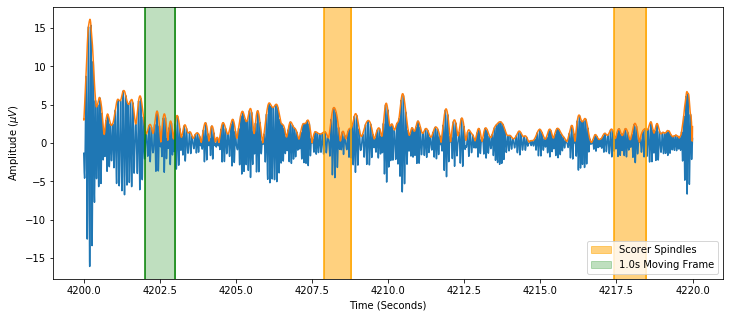

In [87]:
from collections import OrderedDict

# Plot BOTH the original bandpassed signal as well as the envelope:
fig = plt.figure(figsize=(12,5))
plt.plot(time, signal_filtered)
plt.plot(time, sig_filt_env)
# plt.axhline(upper_thresh, linestyle='--', color='green', label='Upper Threshold')
# plt.axhline(lower_thresh, linestyle='--', color='black', label='Lower Threshold')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude ($\mu V$)')

# # Plot the annotations generated from the automatic detection scheme:
# for instances in final_spindles:
#     plt.axvline(instances, linestyle='-', color='red')

# Plot the expert scorer annotations as well on the same epoch (if there are any)
if (len(scorer_annotations) != 0):
    for i in range(len(scorer_annotations)):
        plt.axvline(scorer_annotations['start'][i], linestyle='-', color='orange')
        plt.axvline(scorer_annotations['end'][i], linestyle='-', color='orange')
        plt.axvspan(scorer_annotations['start'][i], scorer_annotations['end'][i], color='orange', alpha=0.5, label='Scorer Spindles')

# # Fill in the gap between the onset and offsets of the tentative spindles with some colour.
# for i in range(len(onsets)):
#     plt.axvspan(onsets[i], offsets[i], alpha=0.2, color='red', label='Potential Spindles')
    
# Generate a window of size 1.0 seconds somewhere near one of the spindles (tentative or actual). For showcase purposes:
window_min = min(time) + 2.0
window_max = min(time) + 3.0
plt.axvline(window_min, color='green')
plt.axvline(window_max, color='green')
plt.axvspan(window_min, window_max, color='green', alpha=0.25, label='1.0s Moving Frame')
    
# Plot the legend:    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right')

# Plot the graph and save figure:
plt.savefig("moving_frame_demonstration_filt.png", dpi=300, bbox_inches='tight')
plt.show()

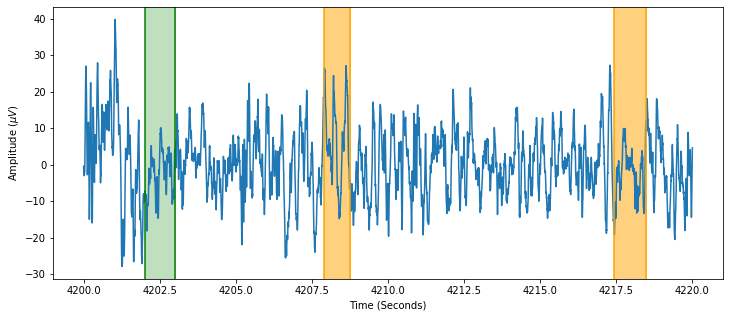

In [86]:
from collections import OrderedDict

# Plot BOTH the original bandpassed signal as well as the envelope:
fig = plt.figure(figsize=(12,5))
plt.plot(time, signal)
# plt.axhline(upper_thresh, linestyle='--', color='green', label='Upper Threshold')
# plt.axhline(lower_thresh, linestyle='--', color='black', label='Lower Threshold')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude ($\mu V$)')

# Plot the annotations generated from the automatic detection scheme:
# for instances in final_spindles:
#     plt.axvline(instances, linestyle='-', color='red')

# Plot the expert scorer annotations as well on the same epoch (if there are any)
if (len(scorer_annotations) != 0):
    for i in range(len(scorer_annotations)):
        plt.axvline(scorer_annotations['start'][i], linestyle='-', color='orange')
        plt.axvline(scorer_annotations['end'][i], linestyle='-', color='orange')
        plt.axvspan(scorer_annotations['start'][i], scorer_annotations['end'][i], color='orange', alpha=0.5, label='Scorer Spindles')

# # Fill in the gap between the onset and offsets of the tentative spindles with some colour.
# for i in range(len(onsets)):
#     plt.axvspan(onsets[i], offsets[i], alpha=0.2, color='red', label='Potential Spindles')
    
# Generate a window of size 1.0 seconds somewhere near one of the spindles (tentative or actual). For showcase purposes:
window_min = min(time) + 2.0
window_max = min(time) + 3.0
plt.axvline(window_min, color='green')
plt.axvline(window_max, color='green')
plt.axvspan(window_min, window_max, color='green', alpha=0.25, label='1.0s Moving Frame')
    
# Plot the legend:    
# plt.legend()
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

# Plot the graph and save figure:
plt.savefig("moving_frame_demonstration_scorer.png", dpi=300, bbox_inches='tight')
plt.show()

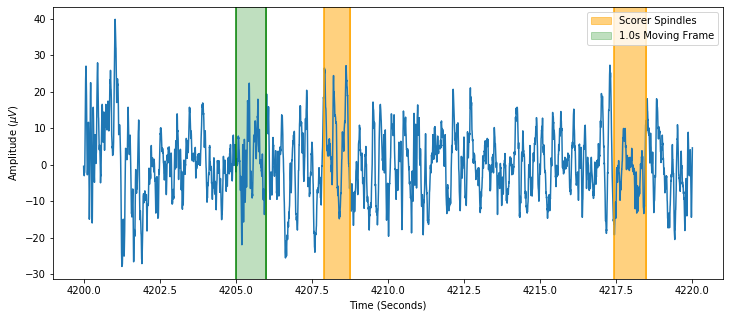

In [85]:
from collections import OrderedDict

# Plot BOTH the original bandpassed signal as well as the envelope:
fig = plt.figure(figsize=(12,5))
plt.plot(time, signal)
# plt.axhline(upper_thresh, linestyle='--', color='green', label='Upper Threshold')
# plt.axhline(lower_thresh, linestyle='--', color='black', label='Lower Threshold')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude ($\mu V$)')

# Plot the annotations generated from the automatic detection scheme:
# for instances in final_spindles:
#     plt.axvline(instances, linestyle='-', color='red')

# Plot the expert scorer annotations as well on the same epoch (if there are any)
if (len(scorer_annotations) != 0):
    for i in range(len(scorer_annotations)):
        plt.axvline(scorer_annotations['start'][i], linestyle='-', color='orange')
        plt.axvline(scorer_annotations['end'][i], linestyle='-', color='orange')
        plt.axvspan(scorer_annotations['start'][i], scorer_annotations['end'][i], color='orange', alpha=0.5, label='Scorer Spindles')

# # Fill in the gap between the onset and offsets of the tentative spindles with some colour.
# for i in range(len(onsets)):
#     plt.axvspan(onsets[i], offsets[i], alpha=0.2, color='red', label='Potential Spindles')
    
# Generate a window of size 1.0 seconds somewhere near one of the spindles (tentative or actual). For showcase purposes:
window_min = min(time) + 5.0
window_max = min(time) + 6.0
plt.axvline(window_min, color='green')
plt.axvline(window_max, color='green')
plt.axvspan(window_min, window_max, color='green', alpha=0.25, label='1.0s Moving Frame')
    
# Plot the legend:    
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Plot the graph and save figure:
#plt.savefig("moving_frame_criteria.png", dpi=300, bbox_inches='tight')
plt.show()

In [95]:
# The actual spindle window. Use the indices to extract the tentative spindle.
spindle_on_idx = np.where(time == onsets[0])
spindle_off_idx = np.where(time == offsets[0])

spindle_on_idx[0][0].astype(int)

4

In [114]:
# The actual spindle window. Use the indices to extract the tentative spindle.
spindle_on_idx = np.where(time == onsets[0]); spindle_on_idx = spindle_on_idx[0][0].astype(int)
spindle_off_idx = np.where(time == offsets[0]); spindle_off_idx = spindle_off_idx[0][0].astype(int)

# Extract the spindle from the filtered version:
tentative_spindle = signal_filtered[spindle_on_idx:spindle_off_idx]

# Extract the tentative spindle and perform NLLS to get the best fit QPS. For showcase purposes:
tmp = len(tentative_spindle)
sampling_rate = raw.info['sfreq']
tentative_window = np.arange(-tmp/(2*sampling_rate), (tmp-1)/(2*sampling_rate), 1/sampling_rate)

# Perform the NLLS regression. Initialise QPS parameters to be their mean values known a priori:
from lmfit import Parameters, minimize

# Set up handler function to be used to compute and minimise the residual via 'lmfit'
def residual(params, t, data):
    a, b, c = params['a'], params['b'], params['c']
    d, e, f = params['d'], params['e'], params['f']

    # The overall envelope MUST be positive. If a negative value is present, set to 0.
    envelope = np.exp(a + b*t + c*t**2)
    carrier = np.cos(d + e*t + f*t**2)

    model = envelope * carrier 
    chi = (data - model)
    return chi

# QPS Parameter initialisation
a = 0.82 / 2.0
b = 1.05 / 2.0
c = -10 / 2.0
d = 0 / 2.0
e = 84.5 / 2.0
f = -0.9 / 2.0

# a = 0.82
# b = 1.05
# c = -10
# d = 0
# e = 84.5
# f = -0.9

# a = 0
# b = 0
# c = 0
# d = 0
# e = 0
# f = 0

# Plug in the initialised parameters into lmfit's 'Parameters' function:
params = Parameters()
params.add('a', value=a)
params.add('b', value=b)
params.add('c', value=c)
params.add('d', value=d)
params.add('e', value=e)
params.add('f', value=f)

# Perform the NLLS regression between the signal and the QPS model:
# Perform the minimisation via NLLS. 
out = minimize(residual, params, args=(tentative_window, tentative_spindle))
out

In [115]:
# We now need to gather all the parameter values from the 'out' return from the minimize function
dict_params = {'a':0, 'b':0, 'c':0, 'd':0, 'e':0, 'f':0}
list_params = ['a','b','c','d','e','f']
for param in list_params:
    dict_params[param] = out.params[param].value

# Generate the QPS model from the particular signal captured by the window:  
a, b, c = dict_params["a"], dict_params["b"], dict_params["c"]
d, e, f = dict_params["d"], dict_params["e"], dict_params["f"]
t = tentative_window
qps = np.exp(a + b*t + c*t**2) * np.cos(d + e*t + f*t**2)

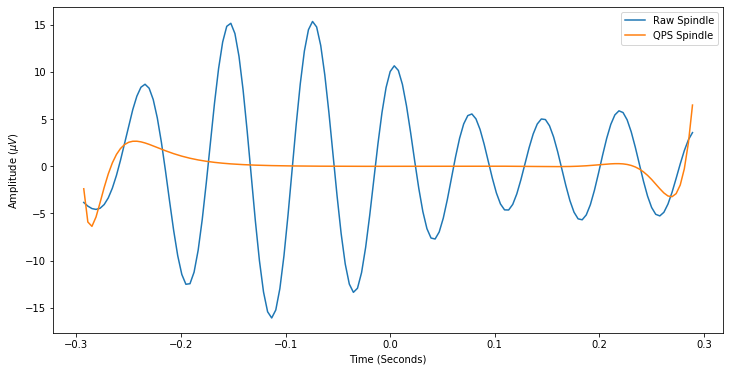

In [116]:
fig = plt.figure(figsize=(12,6))
plt.plot(tentative_window, tentative_spindle, label='Raw Spindle')
plt.plot(tentative_window, qps, label='QPS Spindle')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude ($\mu V$)')
plt.legend()
plt.savefig('example_spindle_breakdown.png', dpi=300, bbox_inches='tight')
plt.show()

In [124]:
a = -2.0406
b = 0
c = -53.0457 
d = 2.0703 
e = 82.3330 
f = 4.680

s_shit = np.exp(a + b*t + c*t**2) * np.cos(d + e*t + f*t**2)

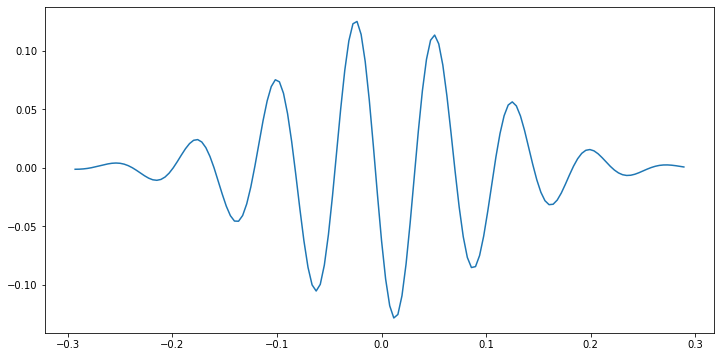

In [125]:
fig = plt.figure(figsize=(12,6))
plt.plot(t, s_shit)
plt.show()